# Introduction
The purpose of this notebook is to check whether the EEG data in NWB format are

# Opening the files
## File naming 
- While NWB file name contain the task, the brainvision files (.vhdr, .eeg, .vmrk) don't have any information about the task. So I assumed that the EEG file contained all the tasks listed in the directory as csv files. 
- The brainvision files don't have a suffix (which is important for the user to identify what is the modality. If the user doesn't know brainvision he/she will not be able to find what correspond to EEG data.)

Here is what the NWB data folder (`/data2/Projects/NKI_RS2/MoBI/NWB/NWB_BIDS_A/sub-M10932681/ses-MOBI2B/`) contains:

```
/data2/Projects/NKI_RS2/MoBI/NWB/NWB_BIDS_A/
└── sub-M10932681
    └── ses-MOBI2B
        ├── sub-M10932681_ses-MOBI2B_task-breathhold_run-001_MoBI.json
        └── sub-M10932681_ses-MOBI2B_task-breathhold_run-001_MoBI.nwb
```

Here is what the folder of the raw data contains:
```
/data2/Projects/NKI_RS2/MoBI/sub-M10932681/
└── ses-MOBI2B
    └── raw
        ├── sub-M10932681_ses-MOBI2B_run-001_audio.wav
        ├── sub-M10932681_ses-MOBI2B_run-001.eeg
        ├── sub-M10932681_ses-MOBI2B_run-001.h5
        ├── sub-M10932681_ses-MOBI2B_run-001.txt
        ├── sub-M10932681_ses-MOBI2B_run-001.vhdr
        ├── sub-M10932681_ses-MOBI2B_run-001.vmrk
        ├── sub-M10932681_ses-MOBI2B_run-002.eeg
        ├── sub-M10932681_ses-MOBI2B_run-002.h5
        ├── sub-M10932681_ses-MOBI2B_run-002.txt
        ├── sub-M10932681_ses-MOBI2B_run-002.vhdr
        ├── sub-M10932681_ses-MOBI2B_run-002.vmrk
        ├── sub-M10932681_ses-MOBI2B_run-IMPTESTFINAL.eeg
        ├── sub-M10932681_ses-MOBI2B_run-IMPTESTFINAL.vhdr
        ├── sub-M10932681_ses-MOBI2B_run-IMPTESTFINAL.vmrk
        ├── sub-M10932681_ses-MOBI2B_task-alphawrite_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-alphawrite_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-alphawrite_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-breathhold_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-breathhold_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-breathhold_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-checkerboard_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-checkerboard_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-checkerboard_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-digisymbol_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-digisymbol_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-digisymbol_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-recallpresent_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-recallpresent_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-recallpresent_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-recallsherlock_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-recallsherlock_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-recallsherlock_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-rey0_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-rey0_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-rey0_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-rey1_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-rey1_run-1_eyetracking.csv
        ├── sub-M10932681_ses-MOBI2B_task-rey1_run-1_video.avi
        ├── sub-M10932681_ses-MOBI2B_task-writesamples_run-1_events.csv
        ├── sub-M10932681_ses-MOBI2B_task-writesamples_run-1_eyetracking.csv
        └── sub-M10932681_ses-MOBI2B_task-writesamples_run-1_video.avi
```

In [7]:
from pynwb import NWBHDF5IO
import numpy as np
import mne
from pathlib import Path

subject = 'sub-M10932681'
session = 'ses-MOBI2B'
path = Path('/data2/Projects/NKI_RS2/MoBI')
nwb_path = path / f'NWB/NWB_BIDS_A/{subject}/{session}'
rawpath = path / f"{subject}/{session}/raw"
fname = Path("sub-M10932681_ses-MOBI2B_task-breathhold_run-001_MoBI")

with NWBHDF5IO(nwb_path / fname.with_suffix(".nwb"), 'r') as io:
    nwbfile = io.read()
    nwb_eeg_object = nwbfile.acquisition['ElectricalSeries_6']
    nwb_data = np.array(nwb_eeg_object.data)
    nwb_time = np.array(nwb_eeg_object.timestamps)
    nwb_description = nwb_eeg_object.description
    nwb_unit = nwb_eeg_object.unit
    print(f"Header of the NWB file for the specific EEG recording:\n{nwb_eeg_object}")

#brainvision_raw = mne.io.read_raw_brainvision(rawpath/f"{subject}_{session}_run-001.vhdr")


Header of the NWB file for the specific EEG recording:
ElectricalSeries_6 pynwb.ecephys.ElectricalSeries at 0x139628518890320
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (352500, 64), type "<f4">
  description: Fp1,Fz,F3,F7,F9,FC5,FC1,C3,T7,CP5,CP1,Pz,P3,P7,P9,O1,Oz,O2,P10,P8,P4,CP2,CP6,T8,C4,Cz,FC2,FC6,F10,F8,F4,Fp2,AF7,AF3,AFz,F1,F5,FT7,FC3,C1,C5,TP7,CP3,P1,P5,PO7,PO3,Iz,POz,PO4,PO8,P6,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2,AF4
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (352500,), type "<f8">
  timestamps_unit: seconds
  unit: volts



# Check the shape of the data
Because the NWB filename have the information about the task whereas the brainvision eeg filename doesn't, I have to check if the brainvision eeg data have more time samples than the NWB data

In [2]:
print(f"Brainvision data has a shape of: {brainvision_raw.get_data().shape}")
print(f"NWB data has a shape of: {nwb_data.shape}")

Brainvision data has a shape of: (64, 1054300)
NWB data has a shape of: (352500, 64)


First, the dimensions don't match: while Brainvision has channel in the first dimension adn time in the second, NWB data has time in first and channel in second. We need to make sure that the dimension match. We need to aggree on a standard about dimensionality and I propose to stick with time as second dimension.

Secondly Brainvision data are indeed longer than the NWB data which confirms that the raw data contains all the tasks. Now I will have to crop the Brainvision data to the size of the actual `breathhold` task. To do so I need to get the start and stop time of that experiment. I assume that these boundaries will be found in the file named "events.csv". Let's take a look.

### Reading the events csv file

In [3]:
import pandas as pd
dataframe = pd.read_csv(rawpath / "sub-M10932681_ses-MOBI2B_task-breathhold_run-1_events.csv")
dataframe.head()


,Unnamed: 0,0,1,2
0,sectionname,starttime,endtime,duration
1,BreathholdStart,0.02417922019958496,8.142535209655762,8.118355989456177
2,Instructions1,8.15911316871643,15.829119205474854,7.670006036758423
3,Instructions2,15.845777034759521,22.29269003868103,6.446913003921509
4,Instructions3,22.30941414833069,24.392749071121216,2.0833349227905273


In [4]:
print(f"The columns of the dataframe are named {list(dataframe.columns)}")

The columns of the dataframe are named ['Unnamed: 0', '0', '1', '2']


The columns of the DataFrame are not very informative, as the first row appears to contain the actual column names. This issue arises because the first row of the CSV file is empty, preventing the header from being detected correctly. In the future, it is important to verify if this is consistent. If not this can lead to complications. Ideally, the first row of a CSV file should not be empty. 

Knowing that the second row is actually the column names let's re-read the CSV file accordingly:

In [5]:
dataframe = pd.read_csv(rawpath / "sub-M10932681_ses-MOBI2B_task-breathhold_run-1_events.csv", header=1)
dataframe

,sectionname,starttime,endtime,duration
0,BreathholdStart,0.024179,8.142535,8.118356
1,Instructions1,8.159113,15.829119,7.670006
2,Instructions2,15.845777,22.292690,6.446913
3,Instructions3,22.309414,24.392749,2.083335
4,Instructions4,24.409554,26.476050,2.066496
...,...,...,...,...
90,Task6:circle3,341.996952,345.013507,3.016555
91,Task6:circle4,345.030186,348.034219,3.004033
92,Task6:circle5,348.050868,351.063585,3.012717
93,Task6:circle6,351.080241,354.080288,3.000047


I can see the events `BreathholdStart` and `BreathholdStop` in the data, which I assume correspond to the beginning and end of the `Breathhold` task. However, there is something unusual: the `BreathholdStart` event includes both a `starttime` and an `endtime`. Typically, such events represent the detection of rising and falling edges of single-pulse signals, with durations usually lasting only a few milliseconds. In this case, however, the durations are 8.1 and 3.7. Are these values in milliseconds, microseconds, or seconds?

If these values are in seconds, then the interpretation of `starttime` and `endtime` for `BreathholdStart` becomes unclear. Based on the name Breathhold, I assume the task involves the subject holding their breath, and Start indicates the beginning of this action. But what do `starttime` and `endtime` mean in this context? What does the "start time" and "end time" of starting to hold one’s breath represent?

Additionally, I couldn’t find a corresponding JSON sidecar file (e.g., ...task-breathhold_run-1_events.json) in the BIDS structure to explain the columns in the CSV file ...task-breathhold_run-1_events.csv, as required. Including this information is essential for proper interpretation.

But let's try to crop the brainvision data to get the EEG data ONLY during Breathholding task which then should match the NWB data length.
I am going to make a lot of assumptions which will lead to a lot of uncertainties but I will readjust empirically after.

I am going to consider only `starttime` and getting croping from the `starttime` of `BreathholdStart` to the `starttime` of `BreathholdStop`.

In [6]:
def report_length(croped_data,nwb_data, column_name):
    print(f"Considering {column_name} in the events file:")
    print(f"Croped data has a shape of: {croped_data.get_data().shape}")
    print(f"NWB data has a shape of: {nwb_data.T.shape}")
    print(f"Difference of length: {croped_data.get_data().shape[1] - nwb_data.shape[0]} samples")

In [7]:
selection = dataframe[((dataframe['sectionname'] == "BreathholdStart") | (dataframe["sectionname"] == "BreathholdStop"))]
selection

,sectionname,starttime,endtime,duration
0,BreathholdStart,0.024179,8.142535,8.118356
94,BreathholdStop,354.096978,357.863686,3.766708


In [8]:
start_crop = selection.loc[0, "starttime"]
stop_crop = selection.loc[94, "starttime"]
croped_data = brainvision_raw.copy().crop(start_crop,stop_crop)
report_length(croped_data,nwb_data, "starttime")

Considering starttime in the events file:
Croped data has a shape of: (64, 354074)
NWB data has a shape of: (64, 352500)
Difference of length: 1574 samples


The length of the croped data doesn't match with the NWB data. Let's try another way:
By considering only the `endtime` this time.

In [9]:
start_crop = selection.loc[0, "endtime"]
stop_crop = selection.loc[94, "endtime"]
croped_data = brainvision_raw.copy().crop(start_crop,stop_crop)
report_length(croped_data,nwb_data, "endtime")

Considering endtime in the events file:
Croped data has a shape of: (64, 349722)
NWB data has a shape of: (64, 352500)
Difference of length: -2778 samples


Still no match. Let's try the `starttime` for `BreathholdStart` and the `endtime` for `BreathholdStop`:

In [10]:
start_crop = selection.loc[0, "starttime"]
stop_crop = selection.loc[94, "endtime"]
croped_data = brainvision_raw.copy().crop(start_crop,stop_crop)
report_length(croped_data,nwb_data, "starttime for BreatholdStart and endtime for BreatholStop")

Considering starttime for BreatholdStart and endtime for BreatholStop in the events file:
Croped data has a shape of: (64, 357841)
NWB data has a shape of: (64, 352500)
Difference of length: 5341 samples


Still no match. Let's try the reverse now: the `endtime` for `BreathholdStart` and the `starttime` for `BreathholdStop`

In [11]:
start_crop = selection.loc[0, "endtime"]
stop_crop = selection.loc[94, "starttime"]
croped_data = brainvision_raw.copy().crop(start_crop,stop_crop)
report_length(croped_data,nwb_data, "endtime for BreatholdStart and starttime for BreatholStop")

Considering endtime for BreatholdStart and starttime for BreatholStop in the events file:
Croped data has a shape of: (64, 345955)
NWB data has a shape of: (64, 352500)
Difference of length: -6545 samples


There is no match. I can't figure out the time chosen to crop the NWB data.
Let's take a look at the NWB file Header for the EEG recording if we can find some informations:

In [12]:
with NWBHDF5IO(nwb_path / fname.with_suffix(".nwb"), 'r') as io:
    nwbfile = io.read()
    nwb_eeg_object = nwbfile.acquisition['ElectricalSeries_6']
    print(f"Header of the NWB file for the specific EEG recording:\n{nwb_eeg_object}")

Header of the NWB file for the specific EEG recording:
ElectricalSeries_6 pynwb.ecephys.ElectricalSeries at 0x140170204263920
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (352500, 64), type "<f4">
  description: Fp1,Fz,F3,F7,F9,FC5,FC1,C3,T7,CP5,CP1,Pz,P3,P7,P9,O1,Oz,O2,P10,P8,P4,CP2,CP6,T8,C4,Cz,FC2,FC6,F10,F8,F4,Fp2,AF7,AF3,AFz,F1,F5,FT7,FC3,C1,C5,TP7,CP3,P1,P5,PO7,PO3,Iz,POz,PO4,PO8,P6,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2,AF4
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (352500,), type "<f8">
  timestamps_unit: seconds
  unit: volts



As we can see the time unit is in seconds. Now let's take a look at the NWB timestamps:

In [13]:
print(f"Start time of NWB data: {nwb_time.min()}")
print(f"End time of NWB data: {nwb_time.max()}")

Start time of NWB data: -2.4997596740722656
End time of NWB data: 350.0012016296387


What is quite confusing is that the data start at around -2 seconds? Meaning that the data timing is relative to an event but which one???
It seems also that the data were croped in order to be "exactly" 350 seconds long from an arbitrary event. On what ground? Why?
So the actual duration would be 350.0012016296387 + 2.4997596740722656 = 352.50096130371094
Let's assume that the first time sample of the NWB data correspond to the `starttime` of `BreathholdStart`, let's crop the brainvision data from `starttime` of `BreathholdStart` to 352.50096130371094 and let's see if the duration match.

In [14]:
start_crop = selection.loc[0, "endtime"]
stop_crop = nwb_time[-1] - nwb_time[0]
croped_data = brainvision_raw.copy().crop(start_crop,stop_crop)
report_length(croped_data,nwb_data, "endtime for BreatholdStart and starttime for BreatholStop")

Considering endtime for BreatholdStart and starttime for BreatholStop in the events file:
Croped data has a shape of: (64, 344359)
NWB data has a shape of: (64, 352500)
Difference of length: -8141 samples


## Check the values of the data
Since I don't seem to get the same shape between the raw data and NWB one I can't directly compare sample-by-sample the values. But let's take a quick look at the values of the NWB data. According to the Header the units are in Volts:

In [15]:
print(f"Maximum value: {nwb_data.max()} {nwb_unit}")
print(f"Minimum value: {nwb_data.min()} {nwb_unit}")
print(f"Mean value: {nwb_data.mean()} {nwb_unit}")
print(f"Median value: {np.median(nwb_data)} {nwb_unit}")

Maximum value: 8643.0 volts
Minimum value: -1511.0 volts
Mean value: 140.1088409423828 volts
Median value: 135.5 volts


The values are not in the range of a normal EEG signal. Usually the range are from tens to hundreds of microvolts. The header information is wrong, it should be changed into mirovolts. Let's assume that the units are in micro-Volts instead of Volts. An average and Median values over 100 micro seems quite high. Let's compare with the raw data:

In [18]:
print(f"Maximum value: {brainvision_raw.get_data().max()} V")
print(f"Minimum value: {brainvision_raw.get_data().min()} V")
print(f"Mean value: {brainvision_raw.get_data().mean()} V")
print(f"Median value: {np.median(brainvision_raw.get_data())} V")

Maximum value: 0.0163835 V
Minimum value: -0.007307999999999999 V
Mean value: 3.3627679502987856e-06 V
Median value: -3e-06 V


The values from the raw data make more sense with extrems value within the millivolts range and the mean and median values being 3.36 and -3 microvolts respectively.

# Comparison between LSL and NWB

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import mne
import pyprep
import mne_bids
import pandas as pd

import pyxdf
def parse_channel_names(eeg_stream: dict) -> dict:
    chan_dict = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    ch_names = list()
    ch_types = list()
    for chan in chan_dict:
        ch_names.append(chan['label'][0])
        if (chan['type'][0].lower() == 'marker'):
            ch_types.append('stim')
        else:
            ch_types.append(chan['type'][0].lower())
    
    parsed_chan_info = {
        "ch_names": ch_names,
        "ch_types": ch_types,
    }
    
    return parsed_chan_info

def convert_signal(eeg_stream:dict) -> np.ndarray:
    units = {
        "microvolts": 1e-6,
        "millivolts": 1e-3,
        "volts": 1,
    }
    unit_matrix = list()
    chan_dict = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    signals = eeg_stream['time_series'].T
    unit_matrix = np.array([[units.get(chan['unit'][0].lower(),1) 
                   for chan in chan_dict]]).T
    return np.multiply(signals,unit_matrix)

filename = "/data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/lsl/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_lsl.xdf.gz"


def read_raw_xdf(filename: str | Path):
    eeg, header = pyxdf.load_xdf(filename, select_streams=5)
    sfreq = float(eeg[0]['info']['nominal_srate'][0])
    info = mne.create_info(**parse_channel_names(eeg[0]),sfreq=sfreq)
    return mne.io.RawArray(convert_signal(eeg[0]), info = info)

In [2]:
lsl_filename = "/data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/lsl/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_lsl.xdf.gz"
bv_filename = "/data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/raw/sub-M10932681_ses-MOBI2B_run-01_eeg.vhdr"
mne.set_log_level(verbose = 'ERROR')
raw = read_raw_xdf(lsl_filename)
raw_bv = mne.io.read_raw_brainvision(bv_filename)
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, on_missing='raise')


#GET THE EVENTS BEFORE RESAMPLING
raw.filter(l_freq = 0, h_freq = 125).resample(250)
prep_params = {
    "ref_chs": "eeg",
    "reref_chs": "eeg",
    "line_freqs": np.arange(60, raw.info['sfreq'] / 2, 60)
}
prep = pyprep.PrepPipeline(raw, 
                           montage = montage, 
                           channel_wise=True,
                           prep_params=prep_params)


#output = prep.fit()
#raw = output.raw.copy()

2024-12-11 15:48:56,190 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/lsl/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_lsl.xdf.gz...
2024-12-11 15:48:59,969 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-11 15:48:59,999 - pyxdf.pyxdf - INFO -   performing jitter removal...
2024-12-11 15:49:17,284 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Fp1'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Fp1']}
2024-12-11 15:49:27,741 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['AF8', 'Fp1', 'Fp2'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Cz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['C3'], 'bad_all': ['Fp2', 'AF8', 'Cz', 'Fp1', 'C3']}
2024-12-11 15:49:28,075 - pyprep.reference - INFO - Iterations: 1
2024-12-11 

## Solve the events issue

In [ ]:
events_1 = mne.find_events(raw)
events_2 = mne.events_from_annotations(raw)

In [1]:
import bids_explorer.architecture.architecture as arch
from pathlib import Path
root = Path('/data2/Projects/NKI_RS2/MoBI/')
architecture = arch.BidsArchitecture(root = root)
descriptor = architecture.report()
descriptor.subjects

AttributeError: 'BidsArchitecture' object has no attribute 'report'

# Annotate Blinks

In [3]:
df_annotation = pd.read_csv('/data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/raw/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_events.csv', header=1)
annotations = mne.Annotations(onset = df_annotation['starttime'].values,
                duration = df_annotation['duration'].values,
                description = df_annotation['sectionname'].values,
)
raw.set_annotations(annotations)
eog_epochs = mne.preprocessing.create_eog_epochs(raw, ch_name = ['Fp1','Fp2'])
blink_annotations = mne.annotations_from_events(eog_epochs.events,
                            raw.info['sfreq'], 
                            event_desc = {eog_epochs.events[0,2]:'blink'}
                                          )
raw.set_annotations(raw.annotations + blink_annotations)
#raw.annotations.to_data_frame()

bidsPath = mne_bids.BIDSPath(subject="M10932681",
                  session = "MOBI2B",
                  run = "01",
                  datatype='eeg',
                  task = 'breathhold',
                  root = './data/')
                  
mne_bids.write_raw_bids(raw, bids_path=bidsPath,
                        allow_preload=True,
                        format='EDF')

BIDSPath(
root: data
datatype: eeg
basename: sub-M10932681_ses-MOBI2B_task-breathhold_run-01_eeg.edf)

## Channel Report

In [4]:
df_dict = {'name': raw_bv.impedances.keys()}
for bad_label, bad_ch in output.noisy_channels_original.items():
    df_dict [bad_label] = np.isin(df_dict['name'],bad_ch)
df_dict['still_noisy'] = np.isin(df_dict['name'],
                                   output.still_noisy_channels)
df_dict['impedances'] = [chi['imp'] for chn, chi in raw_bv.impedances.items() if chn.lower()]
df = pd.DataFrame(df_dict)

chan_df_filename = '/home/slouviot/01_projects/rockland_sample_celaning/data/sub-M10932681/ses-MOBI2B/eeg/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_channels.tsv'
chan_df = pd.read_csv(chan_df_filename,sep='\t')
chan_df = chan_df.set_index('name')
df = df.set_index('name')
result = chan_df.join(df, how = 'outer')
result.to_csv(chan_df_filename,sep='\t')

In [11]:
import os
bidsPath.directory / (os.fspath(bidsPath.basename) +'_channels.tsv')

PosixPath('data/sub-M10932681/ses-MOBI2B/eeg/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_channels.tsv')

In [12]:
bidsPath.update(description = 'test')

BIDSPath(
root: data
datatype: eeg
basename: sub-M10932681_ses-MOBI2B_task-breathhold_run-01_desc-test)

<RawArray | 65 x 352500 (352.5 s), ~174.9 MB, data loaded>

,onset,duration,description
0,1970-01-01 00:00:00.024179,8.118356,BreathholdStart
1,1970-01-01 00:00:01.420000,0.000000,blink
2,1970-01-01 00:00:06.080000,0.000000,blink
3,1970-01-01 00:00:08.159113,7.670006,Instructions1
4,1970-01-01 00:00:08.200000,0.000000,blink
...,...,...,...
127,1970-01-01 00:05:38.980104,3.000046,Task6:circle2
128,1970-01-01 00:05:41.996952,3.016555,Task6:circle3
129,1970-01-01 00:05:45.030186,3.004033,Task6:circle4
130,1970-01-01 00:05:48.050868,3.012717,Task6:circle5


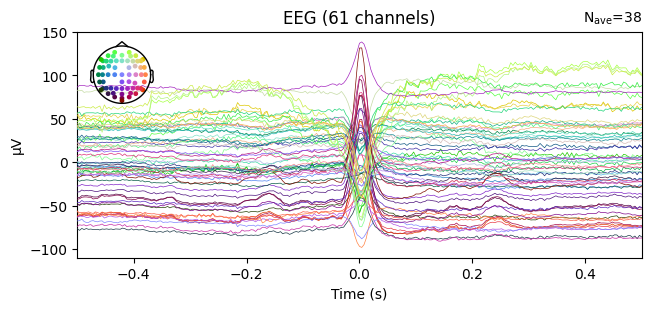

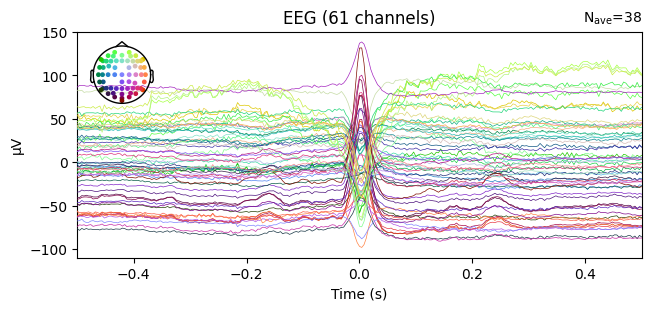

In [129]:
eog_epochs.copy().average().plot()

In [ ]:
raw.filter(0.5,None)
ica = mne.preprocessing.ICA(method = 'picard')
ica.fit(raw)

In [125]:
df

,sectionname,starttime,endtime,duration
0,BreathholdStart,0.024179,8.142535,8.118356
1,Instructions1,8.159113,15.829119,7.670006
2,Instructions2,15.845777,22.292690,6.446913
3,Instructions3,22.309414,24.392749,2.083335
4,Instructions4,24.409554,26.476050,2.066496
...,...,...,...,...
90,Task6:circle3,341.996952,345.013507,3.016555
91,Task6:circle4,345.030186,348.034219,3.004033
92,Task6:circle5,348.050868,351.063585,3.012717
93,Task6:circle6,351.080241,354.080288,3.000047


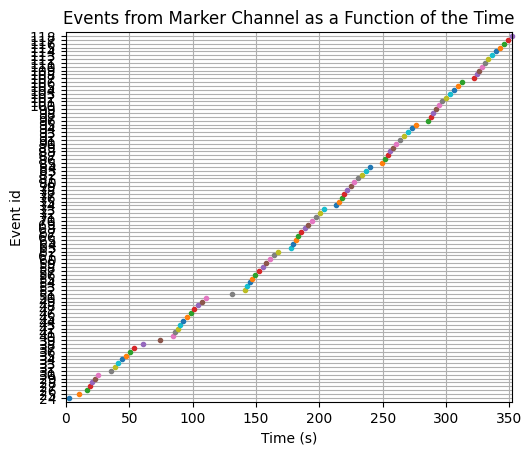

In [116]:

fig = mne.viz.plot_events(
    events_1, sfreq=raw.info["sfreq"], #first_samp=raw.first_samp
    show = False

)
fig.gca().get_legend().remove()
fig.gca().set_title('Events from Marker Channel as a Function of the Time')
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv("/data2/Projects/NKI_RS2/MoBI/sub-M10901084/ses-MOBI1A/raw/sub-M10901084_ses-MOBI1A_task-checkerboard_run-01_events.csv", header=1)
df

,sectionname,starttime,endtime,duration,responsetime,delta
0,CheckerboardStart,0.051145,10.574124,10.522979,NaN,NaN
1,Block1Off,28.224517,48.225811,20.001294,NaN,NaN
2,Block1On,48.256657,68.257052,20.000395,NaN,NaN
3,Block2Off,68.292933,88.293286,20.000353,NaN,NaN
4,Block2On,88.323956,108.324747,20.000791,NaN,NaN
5,Block3Off,108.358020,128.359087,20.001067,NaN,NaN
6,Block3On,128.391861,148.393872,20.002011,NaN,NaN
7,CheckerboardEnd,148.428015,152.027000,3.598985,NaN,NaN


In [7]:
def read_raw_xdf(filename: str | Path) -> mne.io.RawArray:
    """Read the XDF file and convert it into an mne.io.RawArray.

    Args:
        filename (str | Path): The input filename to read.

    Returns:
        mne.io.RawArray: The mne raw object.
    """
    eeg, _ = pyxdf.load_xdf(filename, select_streams=[{"type": "EEG"}])
    sfreq = float(eeg[0]["info"]["nominal_srate"][0])
    info = mne.create_info(**ch.parse_lsl_channel_names(eeg[0]), sfreq=sfreq)
    return mne.io.RawArray(convert_in_volts(eeg[0]), info=info)


In [8]:
raw = read_raw_xdf("/data2/Projects/NKI_RS2/MoBI/sub-M10901084/ses-MOBI1A/lsl/sub-M10901084_ses-MOBI1A_task-checkerboard_run-01_lsl.xdf.gz")

2025-03-04 12:42:55,144 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10901084/ses-MOBI1A/lsl/sub-M10901084_ses-MOBI1A_task-checkerboard_run-01_lsl.xdf.gz...
2025-03-04 12:42:58,257 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-03-04 12:42:58,321 - pyxdf.pyxdf - INFO -   performing jitter removal...


NameError: name 'ch' is not defined

Text(0.5, 1.0, 'Difference between events detected \nfrom marker channel and from csv file')

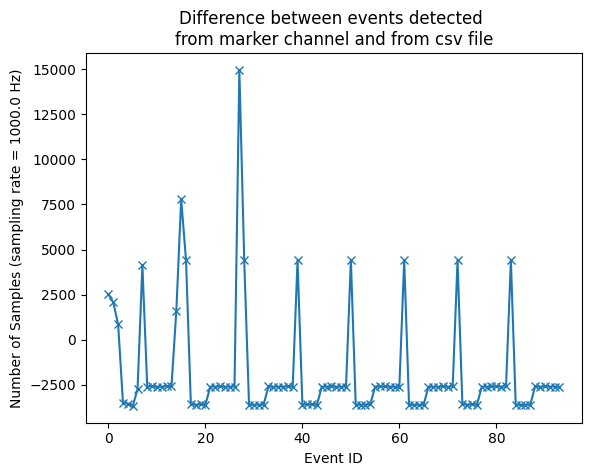

In [102]:
import matplotlib.pyplot as plt
plt.plot(events_1[:-1,0] - events_2[0][:,0], '-x')
plt.ylabel(f'Number of Samples (sampling rate = {raw.info["sfreq"]} Hz)')
plt.xlabel(f'Event ID')
plt.title('Difference between events detected \nfrom marker channel and from csv file')

In [1]:
from eeg_research.system.bids_selector import BidsArchitecture, BidsDescriptor, BidsPath
from pathlib import Path
reading_path = Path("/data2/Projects/NKI_RS2/MoBI/")
saving_path = reading_path / "derivatives"
lsl_architecture = BidsArchitecture(root = reading_path, 
                                    datatype='lsl',
                                    extension = '.gz')
bv_architecture = BidsArchitecture(root = reading_path, 
                                   datatype = 'raw',
                                   extension = '.vhdr')
                                   
bv_descriptor = bv_architecture.report()
lsl_descriptor = lsl_architecture.report()
bv_selection = bv_architecture.select(subject = bv_descriptor.subjects[:2])
lsl_selection = lsl_architecture.select(subject = lsl_descriptor.subjects[:2])

In [2]:
bv_selection.database

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,atime,mtime,ctime,filename
0,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,raw,None,01,None,None,eeg,.vhdr,1652204969,1652204969,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
1,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,raw,None,02,None,None,eeg,.vhdr,1652206461,1652206461,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
2,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,01,None,None,eeg,.vhdr,1655219176,1655219176,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
3,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,02,None,None,eeg,.vhdr,1655220848,1655220848,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
4,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,03,None,None,eeg,.vhdr,1655222813,1655222813,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
5,/data2/Projects/NKI_RS2/MoBI,M10945575,MOBI1,raw,None,01,None,None,eeg,.vhdr,1654360315,1654360315,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses...
6,/data2/Projects/NKI_RS2/MoBI,M10945575,MOBI1,raw,None,02,None,None,eeg,.vhdr,1654363104,1654363104,1702502257,/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses...
7,/data2/Projects/NKI_RS2/MoBI,M10945575,MOBI2,raw,None,01,None,None,eeg,.vhdr,1659882358,1659882358,1733914592,/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses...


In [21]:
bv_architecture.database

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,filename
0,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,raw,None,01,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
1,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,raw,None,02,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
2,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,01,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
3,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,02,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
4,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,raw,MOBI,03,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
...,...,...,...,...,...,...,...,...,...,...,...
969,/data2/Projects/NKI_RS2/MoBI,M10951141,MOBI1A,raw,None,01,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10951141/ses...
970,/data2/Projects/NKI_RS2/MoBI,M10951141,MOBI1A,raw,None,02,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10951141/ses...
971,/data2/Projects/NKI_RS2/MoBI,M10965661,MOBI2,raw,None,01,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/sub-M10965661/sub...
972,/data2/Projects/NKI_RS2/MoBI,BRAINVISIONDEMO,MOBI1,raw,None,01,None,None,eeg,.vhdr,/data2/Projects/NKI_RS2/MoBI/Tests/sub-BRAINVI...


,sectionname,starttime,endtime,duration
0,BreathholdStart,0.024179,8.142535,8.118356
1,Instructions1,8.159113,15.829119,7.670006
2,Instructions2,15.845777,22.292690,6.446913
3,Instructions3,22.309414,24.392749,2.083335
4,Instructions4,24.409554,26.476050,2.066496
...,...,...,...,...
90,Task6:circle3,341.996952,345.013507,3.016555
91,Task6:circle4,345.030186,348.034219,3.004033
92,Task6:circle5,348.050868,351.063585,3.012717
93,Task6:circle6,351.080241,354.080288,3.000047


2024-12-11 11:13:46,098 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10932681/ses-MOBI2B/lsl/sub-M10932681_ses-MOBI2B_task-breathhold_run-01_lsl.xdf.gz...
2024-12-11 11:13:49,674 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-11 11:13:49,699 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=65, n_times=352500
    Range : 0 ... 352499 =      0.000 ...   352.499 secs
Ready.
Trigger channel MkIdx has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
95 events found on stim channel MkIdx
Event IDs: [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118]


/tmp/ipykernel_2645725/2485305058.py:4: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events_1 = mne.find_events(raw)
/tmp/ipykernel_2645725/2485305058.py:10: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
/tmp/ipykernel_2645725/2485305058.py:10: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


<RawArray | 65 x 352500 (352.5 s), ~174.9 MB, data loaded>

In [74]:
events_2 = mne.events_from_annotations(raw)

Used Annotations descriptions: ['BreathholdStart', 'Instructions1', 'Instructions10', 'Instructions11', 'Instructions2', 'Instructions3', 'Instructions4', 'Instructions5', 'Instructions6', 'Instructions7', 'Instructions8:circle1', 'Instructions8:circle2', 'Instructions8:circle3', 'Instructions8:circle4', 'Instructions8:circle5', 'Instructions8:circle6', 'Instructions9', 'PracticeTask:Breath In', 'PracticeTask:Breath Out', 'PracticeTask:Deep Breath and Hold', 'PracticeTask:Get Ready', 'PracticeTask:Rest', 'PracticeTask:circle1', 'PracticeTask:circle2', 'PracticeTask:circle3', 'PracticeTask:circle4', 'PracticeTask:circle5', 'PracticeTask:circle6', 'Task1:Breath In', 'Task1:Breath Out', 'Task1:Deep Breath and Hold', 'Task1:Get Ready', 'Task1:Rest', 'Task1:circle1', 'Task1:circle2', 'Task1:circle3', 'Task1:circle4', 'Task1:circle5', 'Task1:circle6', 'Task2:Breath In', 'Task2:Breath Out', 'Task2:Deep Breath and Hold', 'Task2:Get Ready', 'Task2:Rest', 'Task2:circle1', 'Task2:circle2', 'Task2

In [78]:
events_2

(array([[    24,      0,      1],
        [  8159,      0,      2],
        [ 15846,      0,      5],
        [ 22309,      0,      6],
        [ 24410,      0,      7],
        [ 26493,      0,      8],
        [ 28443,      0,      9],
        [ 31309,      0,     10],
        [ 41043,      0,     11],
        [ 44064,      0,     12],
        [ 47093,      0,     13],
        [ 50110,      0,     14],
        [ 53131,      0,     15],
        [ 56160,      0,     16],
        [ 59193,      0,     17],
        [ 66410,      0,      3],
        [ 79810,      0,     22],
        [ 89831,      0,     21],
        [ 91860,      0,     18],
        [ 93877,      0,     19],
        [ 95910,      0,     20],
        [ 97927,      0,     23],
        [100944,      0,     24],
        [103964,      0,     25],
        [106994,      0,     26],
        [110010,      0,     27],
        [113027,      0,     28],
        [116063,      0,      4],
        [136628,      0,     33],
        [14664

In [79]:
events_1

array([[  2546,      1,     24],
       [ 10232,      1,     25],
       [ 16696,      1,     26],
       [ 18796,      1,     27],
       [ 20879,      1,     28],
       [ 22829,      1,     29],
       [ 25696,      1,     30],
       [ 35429,      1,     31],
       [ 38450,      1,     32],
       [ 41479,      1,     33],
       [ 44496,      1,     34],
       [ 47516,      1,     35],
       [ 50546,      1,     36],
       [ 53579,      1,     37],
       [ 60796,      1,     38],
       [ 74196,      1,     39],
       [ 84216,      1,     40],
       [ 86246,      1,     41],
       [ 88263,      1,     42],
       [ 90296,      1,     43],
       [ 92312,      1,     44],
       [ 95329,      1,     45],
       [ 98350,      1,     46],
       [101379,      1,     47],
       [104396,      1,     48],
       [107412,      1,     49],
       [110433,      1,     50],
       [131012,      1,     51],
       [141029,      1,     52],
       [143046,      1,     53],
       [14

In [ ]:
import os
from pathlib import Path
root = Path('/data2/Projects/NKI_RS2/MoBI/')
pattern = 'sub-*/ses-*/raw/sub-*_ses-*_run*'
log_list = list()
for file in root.rglob(pattern):
    file_str = os.fspath(file)
    run_idx = file_str[file_str.find('run-')+4]
    new_filename = os.fspath(file).replace(f'_run-{run_idx}_',f'_run-0{run_idx}_')
    message = f"{file}\n\t└── Renamed into:{new_filename}\n"
    log_list.append(message)
with open('other_renaming_log.log', 'w', encoding='utf-8') as writing_file:
    writing_file.writelines(log_list)

In [59]:
def rename_bv(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    DataFile = filename.with_suffix('.eeg').name
    MarkerFile = filename.with_suffix('.vmrk').name
    for idx, line in enumerate(lines):
        if 'DataFile' in line:
            lines[idx] = f"DataFile={DataFile}\n"
        elif 'MarkerFile' in line:
            lines[idx] = f"MarkerFile={MarkerFile}\n"

    with open(filename,'w', encoding = 'utf-8') as file:
        file.writelines(lines)

root = Path('/data2/Projects/NKI_RS2/MoBI/')
pattern = 'sub-*/ses-*/raw/sub-*.vhdr'
for file in root.rglob(pattern):
    print(file)
    #file.rename(new_filename)
    rename_bv(file)

/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/raw/sub-M10942248_ses-MOBI1_run-01_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/raw/sub-M10942248_ses-MOBI1_run-02_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI2/raw/sub-M10942248_ses-MOBI2_task-MOBI_run-01_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI2/raw/sub-M10942248_ses-MOBI2_task-MOBI_run-02_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI2/raw/sub-M10942248_ses-MOBI2_task-MOBI_run-03_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses-MOBI1/raw/sub-M10945575_ses-MOBI1_run-01_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses-MOBI1/raw/sub-M10945575_ses-MOBI1_run-02_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses-MOBI2/raw/sub-M10945575_ses-MOBI2_run-01_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10949534/ses-MOBI1/raw/sub-M10949534_ses-MOBI1_run-01_eeg.vhdr
/data2/Projects/NKI_RS2/MoBI/sub-M10949534/ses-MOBI1/raw/sub-M10949534_ses-MOBI1_run-02_eeg.vhdr


In [60]:
mne.io.read_raw_brainvision('/data2/Projects/NKI_RS2/MoBI/sub-M10988888/ses-MOBI2/raw/sub-M10988888_ses-MOBI2_run-01_eeg.vhdr')

Extracting parameters from /data2/Projects/NKI_RS2/MoBI/sub-M10988888/ses-MOBI2/raw/sub-M10988888_ses-MOBI2_run-01_eeg.vhdr...
Setting channel info structure...


/tmp/ipykernel_2385141/3813127262.py:1: RuntimeWarning: No coordinate information found for channels ['ECG', 'EOGL', 'EOGU']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  mne.io.read_raw_brainvision('/data2/Projects/NKI_RS2/MoBI/sub-M10988888/ses-MOBI2/raw/sub-M10988888_ses-MOBI2_run-01_eeg.vhdr')
/tmp/ipykernel_2385141/3813127262.py:1: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['ECG', 'EOGL', 'EOGU']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  mne.io.read_raw_brainvision('/data2/Projects/NKI_RS2/MoBI/sub-M10988888/ses-MOBI2/raw/sub-M10988888_ses-MOBI2_run-01_eeg.vhdr')


<RawBrainVision | sub-M10988888_ses-MOBI2_run-01_eeg.eeg, 64 x 39170000 (7834.0 s), ~78 kB, data not loaded>

A lot of filename in the raw data are breaking bids by having an underscore right after the key `run`. I fixed that.
Another inconsistancy in the bids format is that some raw eeg file have a suffix such as:

`/data2/Projects/NKI_RS2/MoBI/sub-M10945575/ses-MOBI1/raw/sub-M10945575_ses-MOBI1_run-02_eeg.vhdr`

and other don't:

`/data2/Projects/NKI_RS2/MoBI/sub-M10985399/ses-MOBI2/raw/sub-M10985399_ses-MOBI2_run-01.vhdr`.

Other thing is that runs don't have the same number of digit someting they are labeled `01` and sometimes they are labeled `001` Unless it is planned to do more than 99 sessions per subject it is not necessary to use 2 padding 0, therefore I am renaming all the files that has 2 padding zero into 1 padding zero to improve consistencies.
I am also wondering what is `section-1`. Section is not a proper BIDS name we should change this to `acq-01` for acquisition.

The header for brainvision files were also not setup correctly with reference to the wrong Marker file and Data file. I took care of it.

While in the lsl folder run are sometimes called `run-01` and sometimes `run-001` their corresponding event file in the `raw` directory are named with `run-1`.
I am modifying them to `run-01`.
Same for `videos` and same for `eyetracking.edf`.
Sometime there are ECG and EOG channels and sometime not

Events don't correspond to trigger values. They have different values, I am now investigating which events I should take: from the trigger or from the CSV file?
Apparently the EEG stream is not always on the same index across subjects......
Events duration don't have consistent format across subject. After trying on some subject I assumed that the format would be a float (makes sense) but sometime the duration is a fraction like: 111/69 which is understood by python as a string.

Other issues
FileNotFoundError: [Errno 2] No such file or directory: '/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/raw/sub-M10942248_ses-MOBI1_task-cst_run-01_events.csv'

In [4]:
from eeg_research.system.bids_selector import BidsArchitecture
from pathlib import Path
root = Path("/data2/Projects/NKI_RS2/MoBI/")
architecture = BidsArchitecture(root = root,
                                datatype = 'lsl',
                                suffix = 'lsl.xdf',
                                extension = 'gz')

In [6]:
architecture.database.head(20)

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,atime,mtime,ctime,filename
0,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,recallsherlock,01,None,None,lsl.xdf,.gz,1652201648,1652201648,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
1,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,recallpresent,01,None,None,lsl.xdf,.gz,1652201402,1652201402,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
2,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,ravlt2,01,None,None,lsl.xdf,.gz,1652206384,1652206384,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
3,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,ravlt1,01,None,None,lsl.xdf,.gz,1652202288,1652202288,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
4,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,cst,01,None,None,lsl.xdf,.gz,1652206232,1652206232,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
5,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,trails,01,None,None,lsl.xdf,.gz,1652204867,1652204867,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
6,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI1,lsl,rey0,01,None,None,lsl.xdf,.gz,1652204647,1652204647,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
7,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,lsl,segsherlock,01,None,None,lsl.xdf,.gz,1655219029,1655219029,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
8,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,lsl,checkerboard,01,None,None,lsl.xdf,.gz,1655219350,1655219350,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...
9,/data2/Projects/NKI_RS2/MoBI,M10942248,MOBI2,lsl,mst1,01,None,None,lsl.xdf,.gz,1655219486,1655219486,1733916561,/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses...


In [6]:
import cleaning_pipeline
from pathlib import Path
root = Path("/data2/Projects/NKI_RS2/MoBI/")
for _, file in architecture.database.iterrows():
    cleaning_pipeline.pipeline(
        root = root,
        subject=file['subject'],
        session=file['session'],
        task=file['task'],
        run=file['run'],
    )

2024-12-16 15:07:02,257 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/lsl/sub-M10942248_ses-MOBI1_task-recallsherlock_run-01_lsl.xdf.gz...
2024-12-16 15:07:14,579 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-16 15:07:14,612 - pyxdf.pyxdf - INFO -   performing jitter removal...
2024-12-16 15:07:58,547 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2024-12-16 15:08:18,496 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['AF8'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['AF8', 'FT7']}
2024-12-16 15:08:18,674 - pyprep.reference - INFO - Iterations: 1
2024-12-16 15:08:36,737 - pyprep.reference - INFO - Bad

ValueError: Physical minimum (-1.0) must differ from physical maximum (-1.0).

In [7]:
import pyxdf
pathlsl = "/data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/lsl/sub-M10942248_ses-MOBI1_task-recallsherlock_run-01_lsl.xdf.gz"
eeg, _ = pyxdf.load_xdf(pathlsl, select_streams=[{'type': 'EEG'}])

2024-12-16 15:10:07,116 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/lsl/sub-M10942248_ses-MOBI1_task-recallsherlock_run-01_lsl.xdf.gz...
2024-12-16 15:10:19,018 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-16 15:10:19,053 - pyxdf.pyxdf - INFO -   performing jitter removal...


In [8]:
raw = cleaning_pipeline.read_raw_xdf(pathlsl)

2024-12-16 15:11:02,487 - pyxdf.pyxdf - INFO - Importing XDF file /data2/Projects/NKI_RS2/MoBI/sub-M10942248/ses-MOBI1/lsl/sub-M10942248_ses-MOBI1_task-recallsherlock_run-01_lsl.xdf.gz...
2024-12-16 15:11:14,584 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-16 15:11:14,618 - pyxdf.pyxdf - INFO -   performing jitter removal...


In [13]:
import mne_bids
raw.resample(250)
p = mne_bids.BIDSPath(
    root = "./data",
    subject = "M10942248",
    task = "recallsherlock",
    run = "01",
    session = "MOBI1",
                      )
mne_bids.write_raw_bids(raw, p, allow_preload = True, format = "")


ValueError: Physical minimum (-1.0) must differ from physical maximum (-1.0).

In [22]:
import numpy as np
raw

<RawArray | 65 x 52760 (211.0 s), ~26.2 MB, data loaded>

In [5]:
import mne
raw = mne.io.read_raw_brainvision('/data2/Projects/NKI_RS2/MoBI/sub-M10901084/ses-MOBI2C/raw/sub-M10901084_ses-MOBI2C_run-01_eeg.vhdr')

In [6]:
raw

<RawBrainVision | sub-M10901084_ses-MOBI2C_run-01_eeg.eeg, 64 x 1963780 (1963.8 s), ~79 kB, data not loaded>

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('/data2/Projects/NKI_RS2/MoBI/sub-M10901084/ses-MOBI2C/raw/sub-M10901084_ses-MOBI2C_task-nasa_run-01_events.csv',
                 dtype = {
                            'sectionname': str,
                            'starttime': np.float32,
                            'endtime': np.float32,
                            },
                 header=1,
                 usecols=['sectionname','starttime','endtime']
                 )

In [13]:
df

,sectionname,starttime,endtime
0,LeanStart,0.020766,8.489112
1,BP_0,82.273560,82.273560
2,BP_1,145.691132,145.691132
3,BP_2,203.941971,203.941971
4,Supine,37.610477,217.625504
5,BP_3,292.143250,292.143250
6,BP_4,349.827423,349.827423
7,BP_5,411.561676,411.561676
8,BP_6,500.929626,500.929626
9,BP_7,542.696960,542.696960


In [14]:
df['duration'] = df['endtime']-df['starttime']

In [15]:
df

,sectionname,starttime,endtime,duration
0,LeanStart,0.020766,8.489112,8.468346
1,BP_0,82.273560,82.273560,0.000000
2,BP_1,145.691132,145.691132,0.000000
3,BP_2,203.941971,203.941971,0.000000
4,Supine,37.610477,217.625504,180.015030
5,BP_3,292.143250,292.143250,0.000000
6,BP_4,349.827423,349.827423,0.000000
7,BP_5,411.561676,411.561676,0.000000
8,BP_6,500.929626,500.929626,0.000000
9,BP_7,542.696960,542.696960,0.000000


In [7]:
for stream in eeg:
    print(stream['info'])

defaultdict(<class 'list'>, {'name': ['StimLabels'], 'type': ['Markers'], 'channel_count': ['1'], 'channel_format': ['string'], 'source_id': ['markers-nkirs-Precision-3650-Tower'], 'nominal_srate': ['0.000000000000000'], 'version': ['1.100000000000000'], 'created_at': ['68167.51428583000'], 'uid': ['289c0ac8-d1dc-4585-9d29-37cde1b505aa'], 'session_id': ['default'], 'hostname': ['nkirs-Precision-3650-Tower'], 'v4address': [None], 'v4data_port': ['16574'], 'v4service_port': ['16574'], 'v6address': [None], 'v6data_port': ['16575'], 'v6service_port': ['16575'], 'desc': [defaultdict(<class 'list'>, {'channels': [defaultdict(<class 'list'>, {'channel': [defaultdict(<class 'list'>, {'label': ['StimMarkers_alpha'], 'unit': ['na'], 'type': ['LabelMarkers']})]})]})], 'stream_id': 1, 'effective_srate': 0})
defaultdict(<class 'list'>, {'name': ['BrainVision RDA Markers'], 'type': ['Markers'], 'channel_count': ['1'], 'channel_format': ['string'], 'source_id': ['RDA 10.10.10.5:51244 Marker'], 'nomin

In [12]:
eeg[0]['info']


defaultdict(list,
            {'name': ['OpenSignals'],
             'type': ['00:07:80:4B:3F:36'],
             'channel_count': ['9'],
             'nominal_srate': ['1000'],
             'channel_format': ['float32'],
             'source_id': ['OpenSignals'],
             'version': ['1.1000000000000001'],
             'created_at': ['67303.411210100006'],
             'uid': ['c40d13fb-4d82-4898-a606-82bab7453903'],
             'session_id': ['default'],
             'hostname': ['DESKTOP-KMDE17V'],
             'v4address': [None],
             'v4data_port': ['16573'],
             'v4service_port': ['16573'],
             'v6address': [None],
             'v6data_port': ['16573'],
             'v6service_port': ['16573'],
             'desc': [defaultdict(list,
                          {'manufacturer': ['OpenSignals'],
                           'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,
                              

In [4]:
a = []
a != []

False